In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jasmine163","key":"165d6d8f52f1caf72e13a9cd13f7178c"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                       title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                            Apple Quality                              170KB  2024-01-11 14:31:07          10653        252  1.0              
shiivvvaam/top-youtuber-worldwide                         Top YouTubers Worldwide                     83KB  2024-02-05 09:33:23            711         37  1.0              
shiivvvaam/indian-districts-population-data               Indian Districts Population Data            46KB  2024-02-04 16:05:17            511         30  1.0              
hummaamqaasim/jobs-in-data                                Jobs and Salaries in Data Science           76KB  2023-12-25 20:03:32        

In [7]:
!kaggle datasets download -d jainilcoder/online-payment-fraud-detection

 83% 148M/178M [00:00<00:00, 219MB/s]
100% 178M/178M [00:00<00:00, 211MB/s]


In [8]:
!unzip online-payment-fraud-detection.zip

Archive:  online-payment-fraud-detection.zip
  inflating: onlinefraud.csv         


In [9]:
import pandas as pd
import numpy as np

In [10]:
data= pd.read_csv("/content/online-payment-fraud-detection.zip")
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [11]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [13]:
duplicates_info = data[data.duplicated()]
print(duplicates_info)

Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [14]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


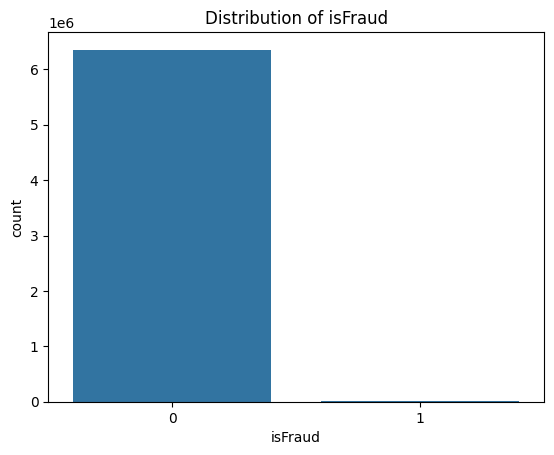

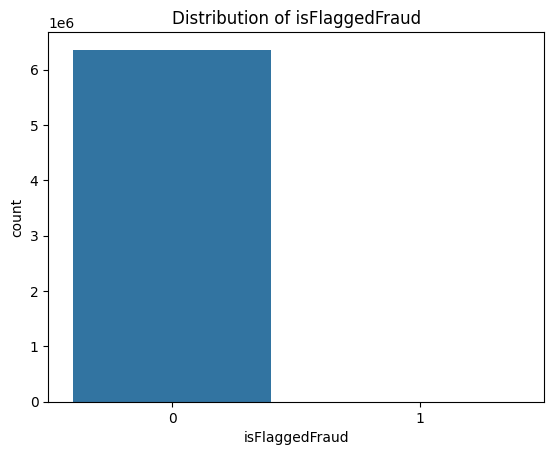

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'isFraud' and 'isFlaggedFraud'
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of isFraud')
plt.show()

sns.countplot(x='isFlaggedFraud', data=data)
plt.title('Distribution of isFlaggedFraud')
plt.show()


In [16]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [17]:
type_counts = data['type'].value_counts()


In [18]:
# Accessing the transaction types and their quantities
transaction = type_counts.index
quantity = type_counts.values

In [19]:
import plotly.express as px
figure = px.pie(data, values = quantity, names = transaction, hole = 0.5, title = "Distribution of Transaction type")
figure.show()

In [20]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [21]:
type = data['type'].value_counts()
type

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [22]:
corr = data.corr()
corr

<ipython-input-22-df690e1cacaf>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [23]:
data['type'] = data['type'].map({'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5})

In [24]:
# data['isFraud'] = data['isFraud'].map({0:'No_Fraud', 1:'Fraud'})

In [25]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [26]:
from sklearn.model_selection import train_test_split

In [44]:
X = np.array(data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest']])

In [45]:
y = np.array(data[['isFraud']])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [59]:
from sklearn.linear_model import LogisticRegression

# Define logistic regression model with balanced class weights
logreg = LogisticRegression(class_weight='balanced')

# Train the logistic regression model
logreg.fit(X_train, y_train)

# Make predictions
predictions = logreg.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [60]:
logreg.score(X_test,y_test)

0.6551082730070317

In [76]:
logreg.predict([[3,269828.27,1766188,446016.87,1305775.32,1035947.45]])

array([1])

In [61]:
from imblearn.under_sampling import RandomUnderSampler

In [67]:


# Assuming X and y are your features and target variable respectively
# Perform majority undersampling to address the imbalanced classes in the dataset
undersample = RandomUnderSampler(sampling_strategy='majority')

# Obtaining the undersampled dataframes - testing and training
X_resampled, y_resampled = undersample.fit_resample(X, y)


In [68]:
logreg.score(X_test,y_test)

0.6543051447359736

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Precision: 0.9988957680700051
Recall: 0.9976857018020878
F1-score: 0.9981654235489298


In [74]:
model.predict([[3,269828.27,1766188,446016.87,1305775.32,1035947.45]])

array([1])

In [34]:
print(y_resampled.shape)


(16426,)


In [35]:
import pandas as pd

# Assuming y_resampled is your target variable after undersampling
# Convert y_resampled to a DataFrame for easier analysis
y_resampled_df = pd.DataFrame(y_resampled, columns=['isFraud'])

# Check the distribution of classes in the undersampled dataset
class_distribution = y_resampled_df['isFraud'].value_counts()
print("Class distribution after undersampling:")
print(class_distribution)

# Calculate the ratio of minority class to majority class
minority_class_count = class_distribution[1]  # Assuming 1 represents the minority class
majority_class_count = class_distribution[0]  # Assuming 0 represents the majority class
balance_ratio = minority_class_count / majority_class_count

# Check if the dataset is balanced based on some threshold (e.g., balance_ratio close to 1)
if balance_ratio >= 0.5 and balance_ratio <= 2:
    print("The dataset is balanced.")
else:
    print("The dataset is not balanced.")



Class distribution after undersampling:
0    8213
1    8213
Name: isFraud, dtype: int64
The dataset is balanced.
